In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from scipy import stats
from scipy.stats import shapiro 
from scipy.stats import kstest
pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = 100

In [2]:
df = pd.read_csv('black_friday.csv')

In [3]:
df.shape

(550068, 12)

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [6]:
df['Product_ID'] = df['Product_ID'].astype(str)
df['Gender'] = df['Gender'].astype(str)
df['Age'] = df['Age'].astype(str)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(str)
#df['Adj Close'] = df['Adj Close'].astype(float)
#df['Volume'] = df['Volume'].astype(float)

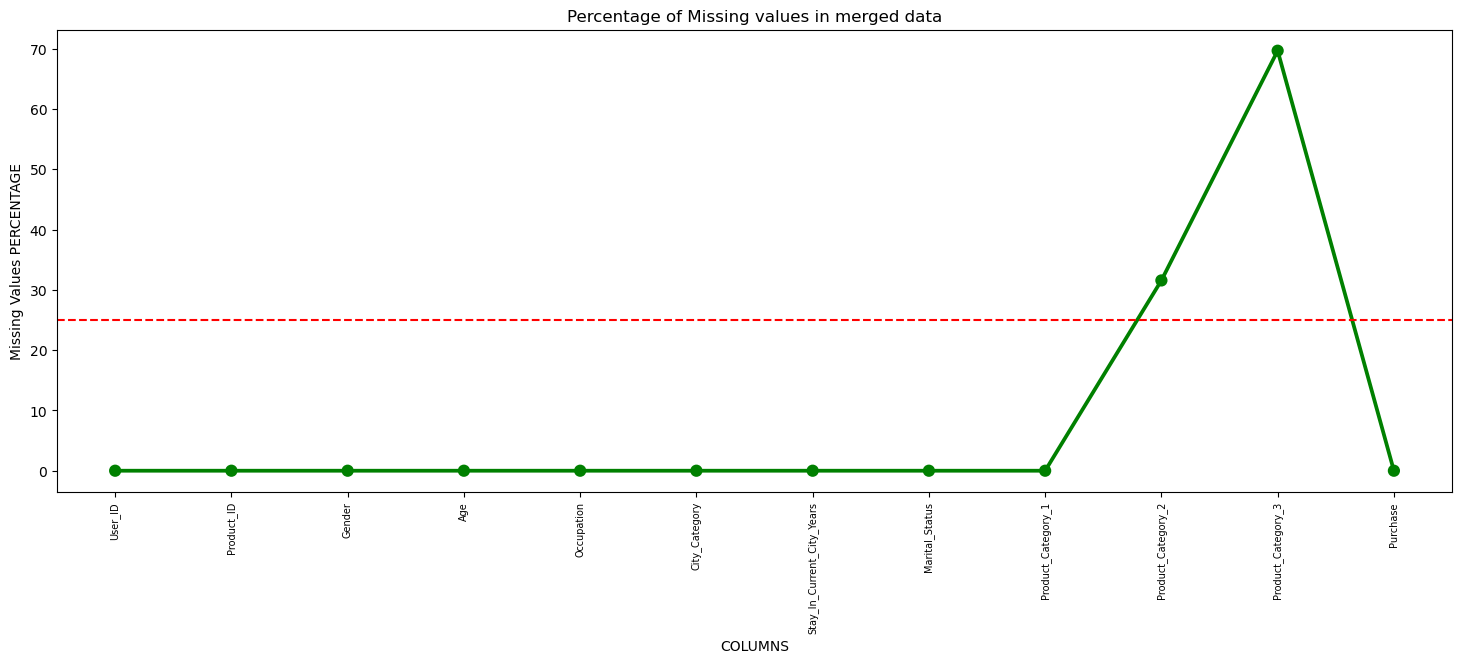

In [7]:
### This plot give us the insight about Variables who have missing values more than 25%.
 
null_data = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
null_data.columns = ['Column', 'Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column",y="Percentage",data=null_data,color='green')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(25, ls='--',color='red')
plt.title("Percentage of Missing values in merged data")
plt.ylabel("Missing Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [8]:
# Dropping the columns Product_Category_2, Product_Category_3 as it contains 31% and 70% of the missing values
df.drop("Product_Category_2", axis = 1, inplace=True)
df.drop("Product_Category_3", axis = 1, inplace=True)

In [9]:
# Examine the percentage of duplication.
(df.duplicated().sum()/df.shape[0])*100

0.0

In [10]:
(df.isnull().sum()/df.shape[0])*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Purchase                      0.0
dtype: float64

### EDA 

In [11]:
df.drop("User_ID", axis = 1).describe()

,Occupation,Marital_Status,Product_Category_1,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000
mean,8.076707,0.409653,5.404270,9263.968713
std,6.522660,0.491770,3.936211,5023.065394
min,0.000000,0.000000,1.000000,12.000000
25%,2.000000,0.000000,1.000000,5823.000000
50%,7.000000,0.000000,5.000000,8047.000000
75%,14.000000,1.000000,8.000000,12054.000000
max,20.000000,1.000000,20.000000,23961.000000


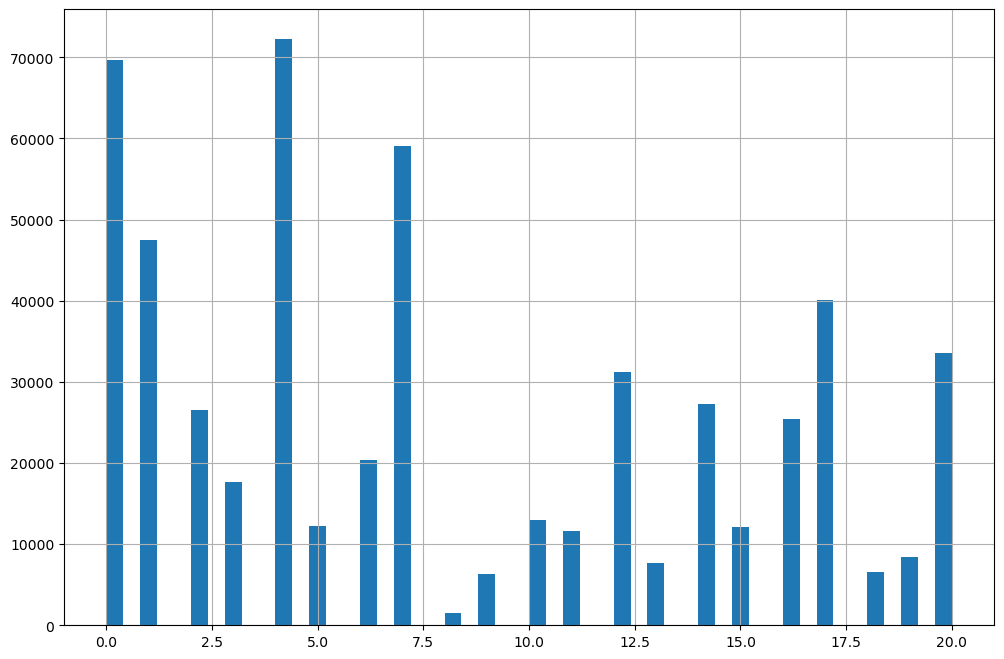

In [12]:
df.Occupation.hist(bins = 50 , figsize= (12,8))
plt.show()

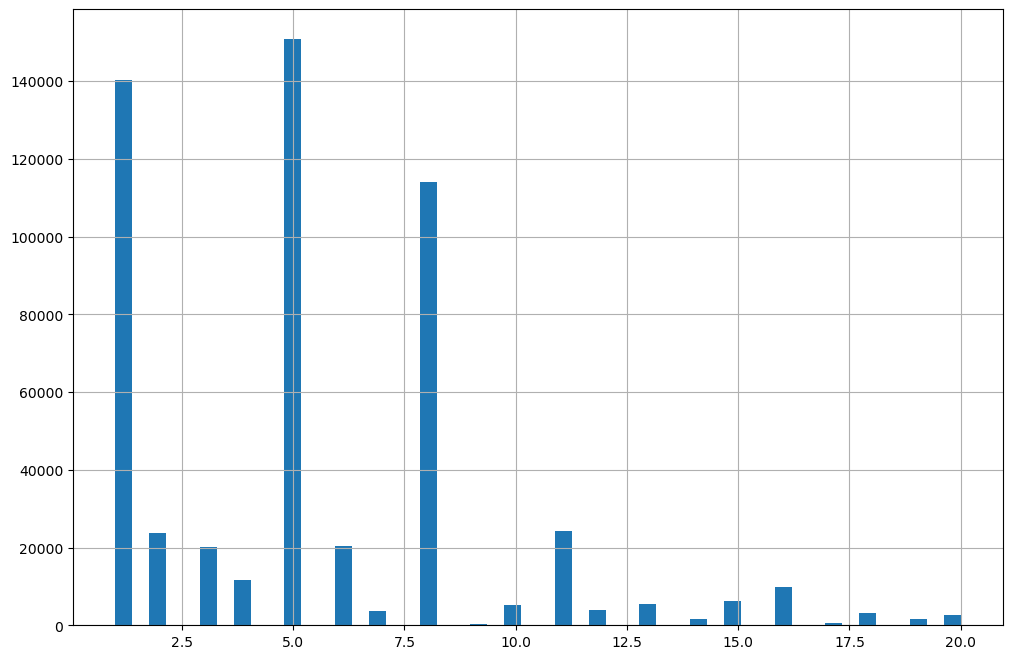

In [13]:
df.Product_Category_1.hist(bins = 50 , figsize= (12,8))
plt.show()

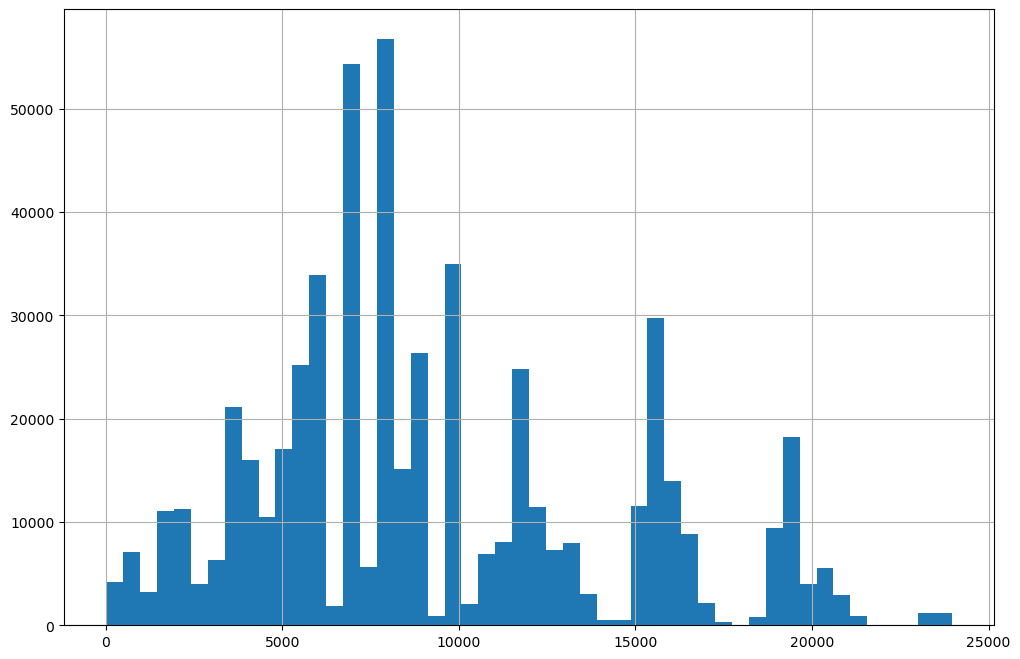

In [14]:
df.Purchase.hist(bins = 50 , figsize= (12,8))
plt.show()

array([<Axes: ylabel='Density'>], dtype=object)

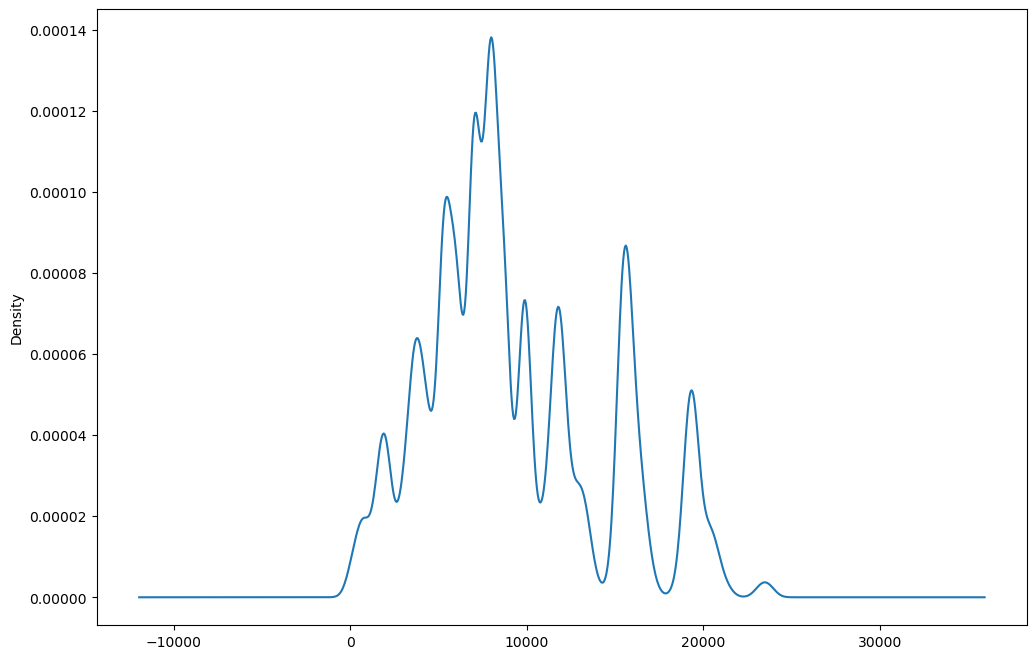

In [15]:
df["Purchase"].plot(kind = "density", subplots = True,  figsize = (12,8))

Except for the occurrence of sum outliers at values greater than 20,000, we may observe that our data is nearly normal or follows the gaussian distribution.

In [16]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

<Axes: xlabel='Purchase'>

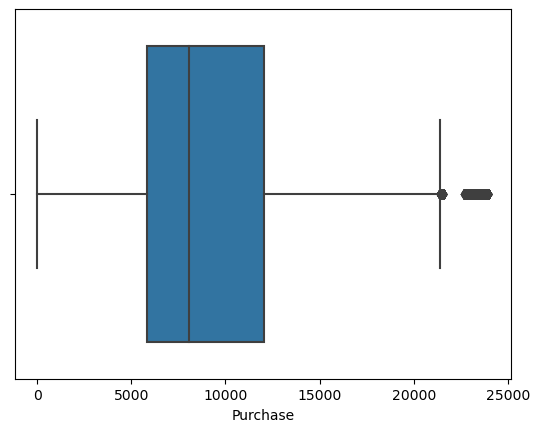

In [17]:
sns.boxplot(x = df["Purchase"])

In [18]:
# checking unique product id's
df["Product_ID"].unique().shape[0]

3631

In [19]:
# Checking the effect of gender on the sales
gender_df = df.groupby('Gender')["Purchase"].sum()

In [20]:
gender_df = pd.DataFrame(gender_df)
gender_df.head()

,Purchase
Gender,
F,1186232642
M,3909580100


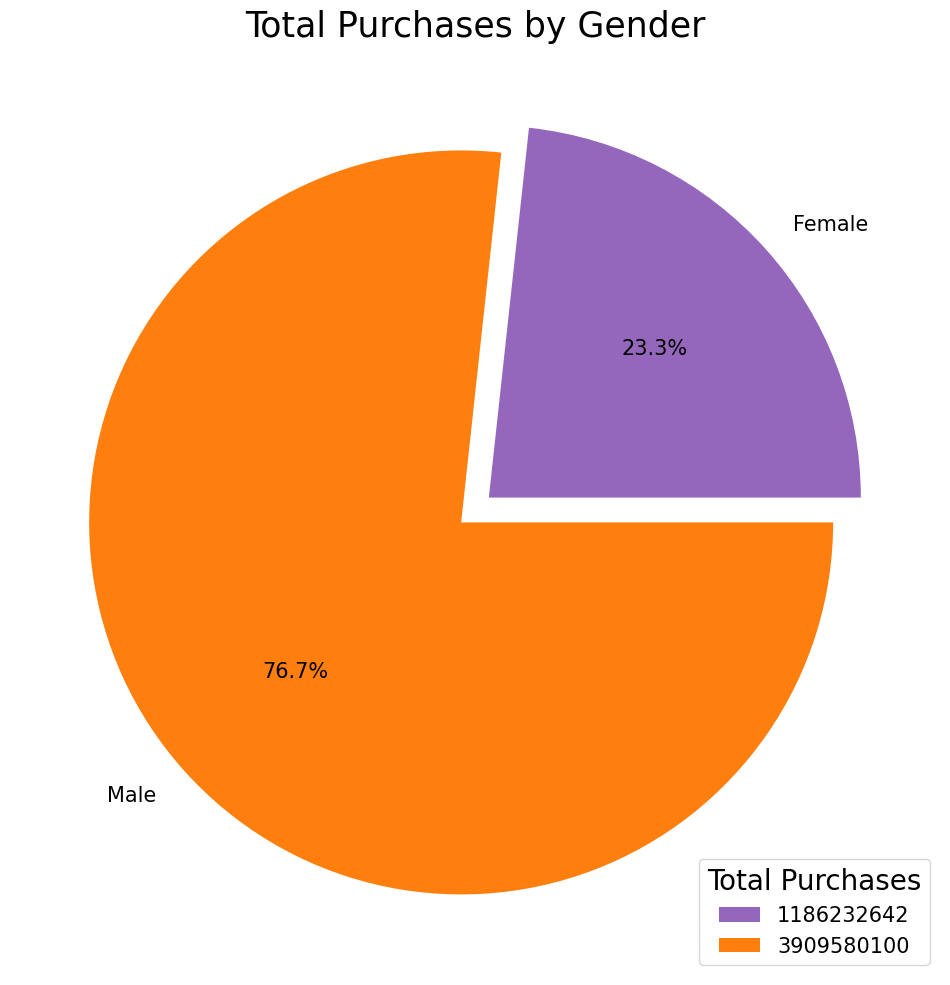

In [21]:
labels = ["Female", "Male"]
sizes = gender_df["Purchase"]
colors = ['#9467bd', '#ff7f0e']
plt.figure(figsize = (12,20))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':15, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Total Purchases by Gender', color = 'Black',fontsize = 25)
plt.legend(gender_df["Purchase"], loc = 'lower right', title = 'Total Purchases',title_fontsize = "20",
           fontsize = "15")
plt.show()

We can observe that men have made the majority of the purchases.

In [22]:
# Cheking the effect of age on the purchase 
Age_df = df.groupby('Age')["Purchase"].sum()
Age_df = pd.DataFrame(Age_df)
Age_df.head(3)

,Purchase
Age,
0-17,134913183
18-25,913848675
26-35,2031770578


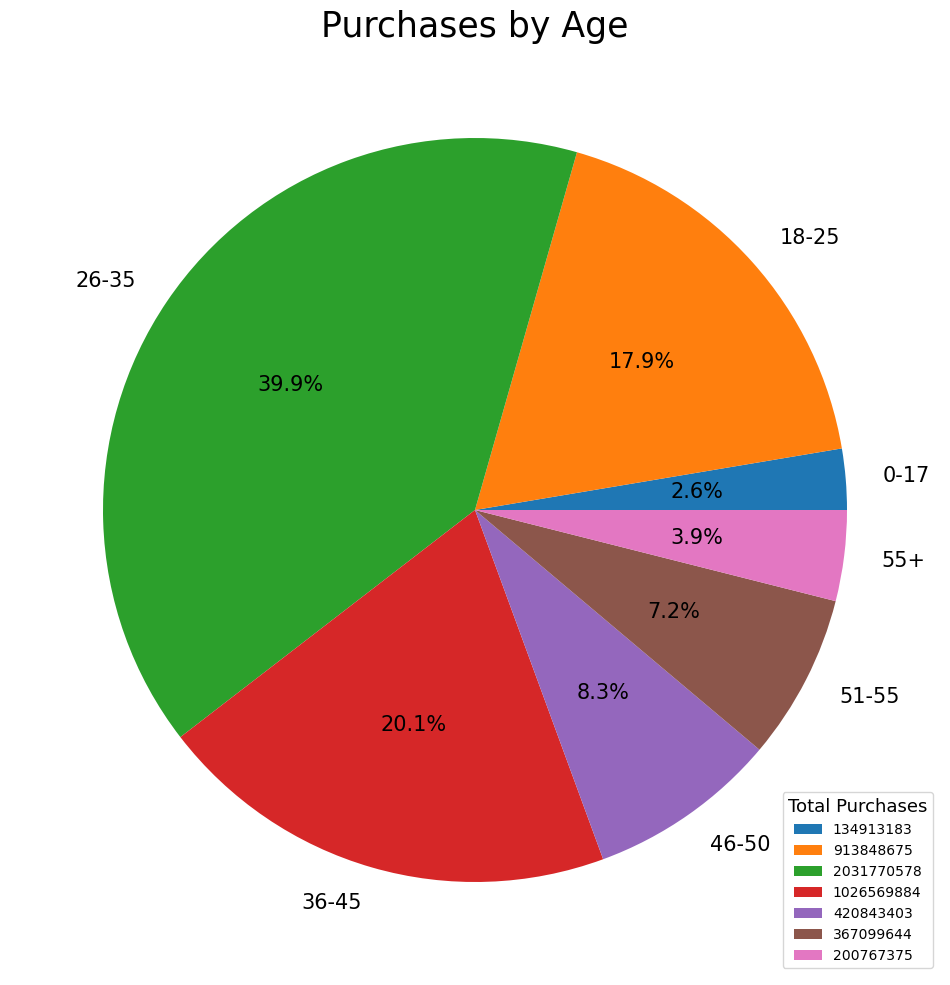

In [23]:
labels = Age_df["Purchase"].keys()
sizes = Age_df["Purchase"]
plt.figure(figsize = (12,20))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':15, 'color':"black"})
plt.title('Purchases by Age',color = 'Black',fontsize = 25)
plt.legend(Age_df["Purchase"], loc = 'lower right', title = 'Total Purchases', 
           title_fontsize = "13", fontsize = "10")
plt.show()

Young adults between the ages of 26 and 35 make up the largest buying group, accounting for almost 40% of all transactions, with the majority of purchases being made by those between the ages of 18 and 45.

In [24]:
# Checkinhg the relationship between occupation and the purchase ?
Occ_df = df.groupby('Occupation')["Purchase"].sum()
Occ_df = pd.DataFrame(Occ_df)
Occ_df.reset_index(inplace = True)

In [25]:
Occ_sort = Occ_df.sort_values("Purchase",  ascending = False)
Occ_sort = pd.DataFrame(Occ_sort)
Occ_sort.reset_index(inplace = True)
Occ_sort["Occupation"] = Occ_sort["Occupation"].astype(str)

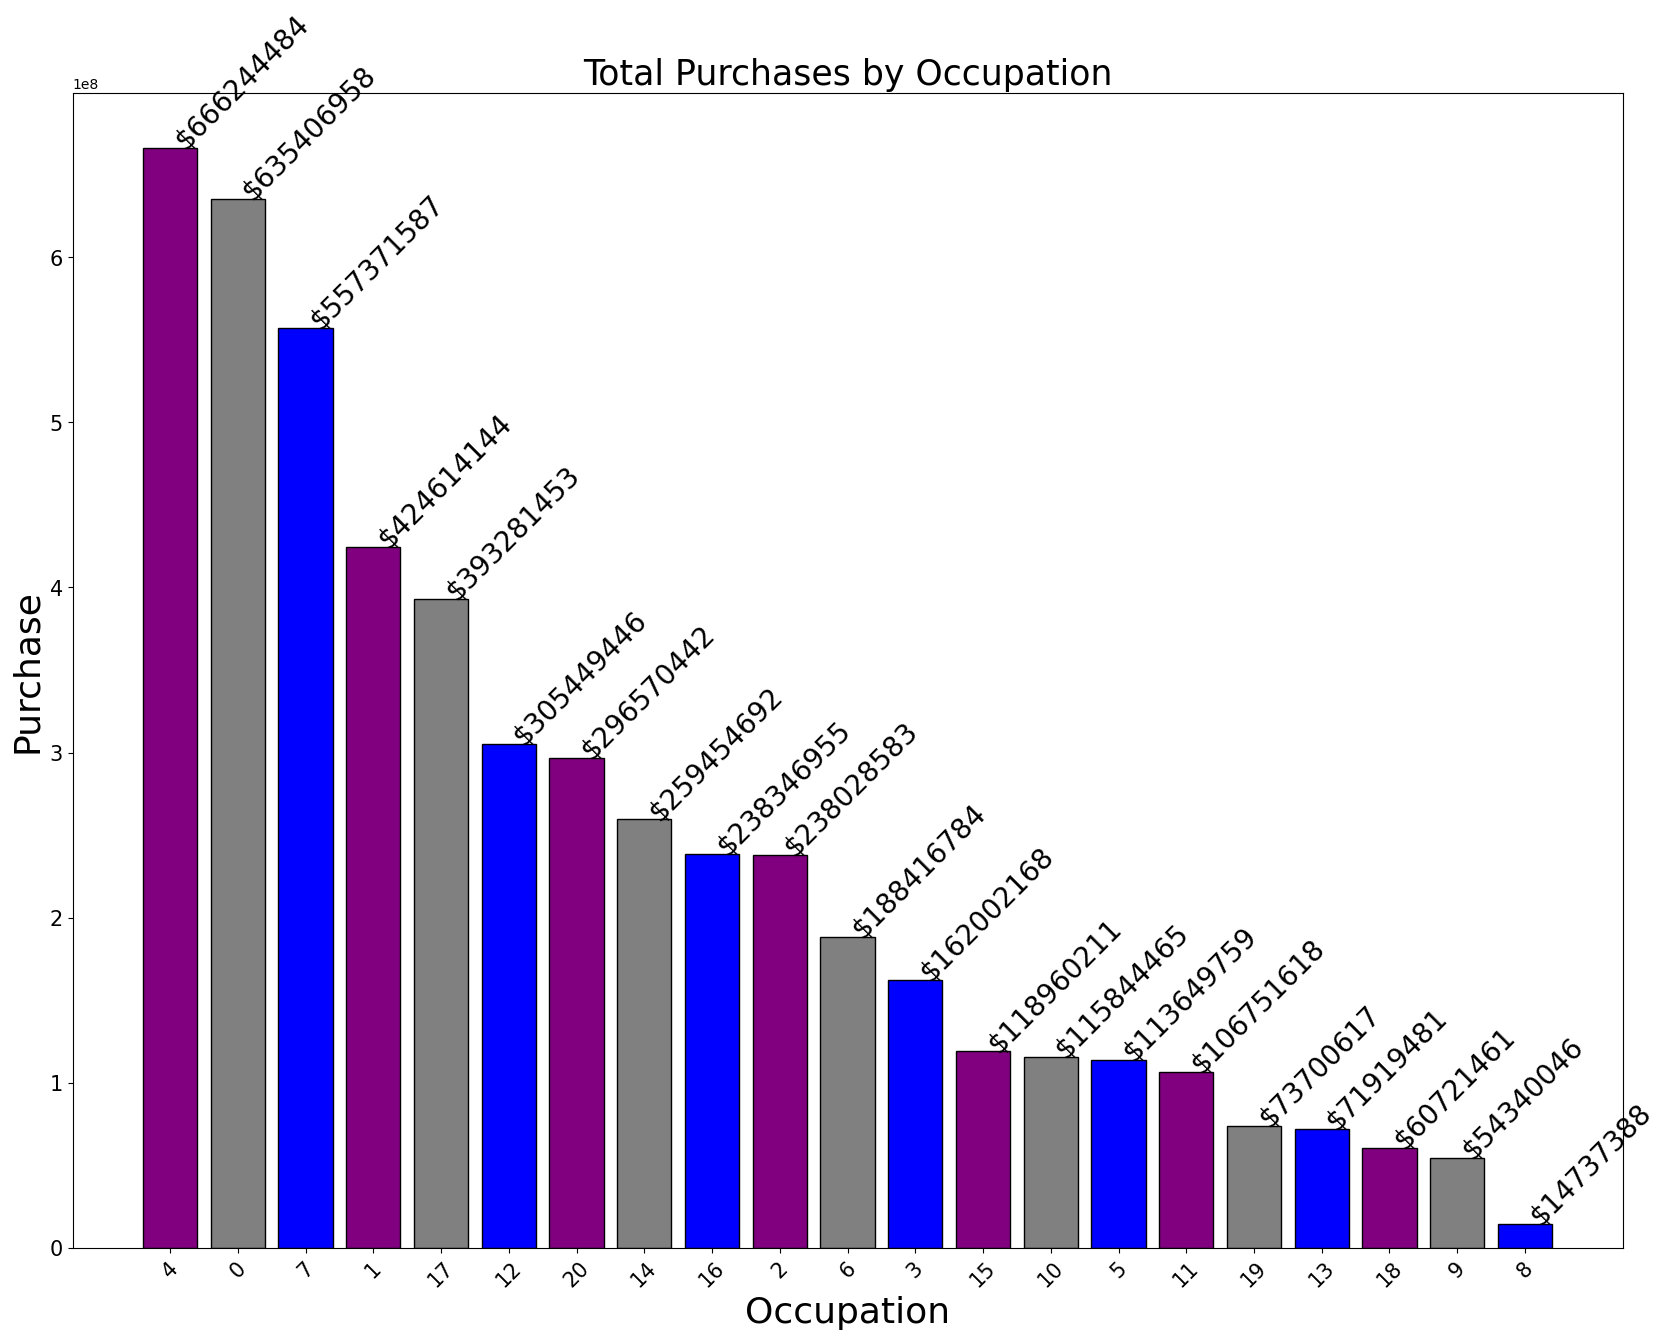

In [26]:
plt.figure(figsize = (20,15)) 
plt.bar(Occ_sort["Occupation"], Occ_sort["Purchase"],
        color= ('purple', "grey", 'blue'),edgecolor='black', linewidth = 1)
plt.xticks(fontsize=15, rotation=45) 
plt.yticks(fontsize=15) 
plt.xlabel("Occupation",fontsize=26) 
plt.ylabel("Purchase",fontsize=26) 
plt.title('Total Purchases by Occupation',color = 'Black',fontsize = 25)
for k,v in Occ_sort["Purchase"].items(): 
    plt.text(k,v,'$'+ str(v), fontsize=20, rotation=45, color='k')

We saw that the top 3 occupations with the highest number of purchases are, in order, 4, 0, then 7.

In [27]:
# checking the effect of city on purchaes 
City_df= df.groupby('City_Category')["Purchase"].sum()
City_df = pd.DataFrame(City_df)

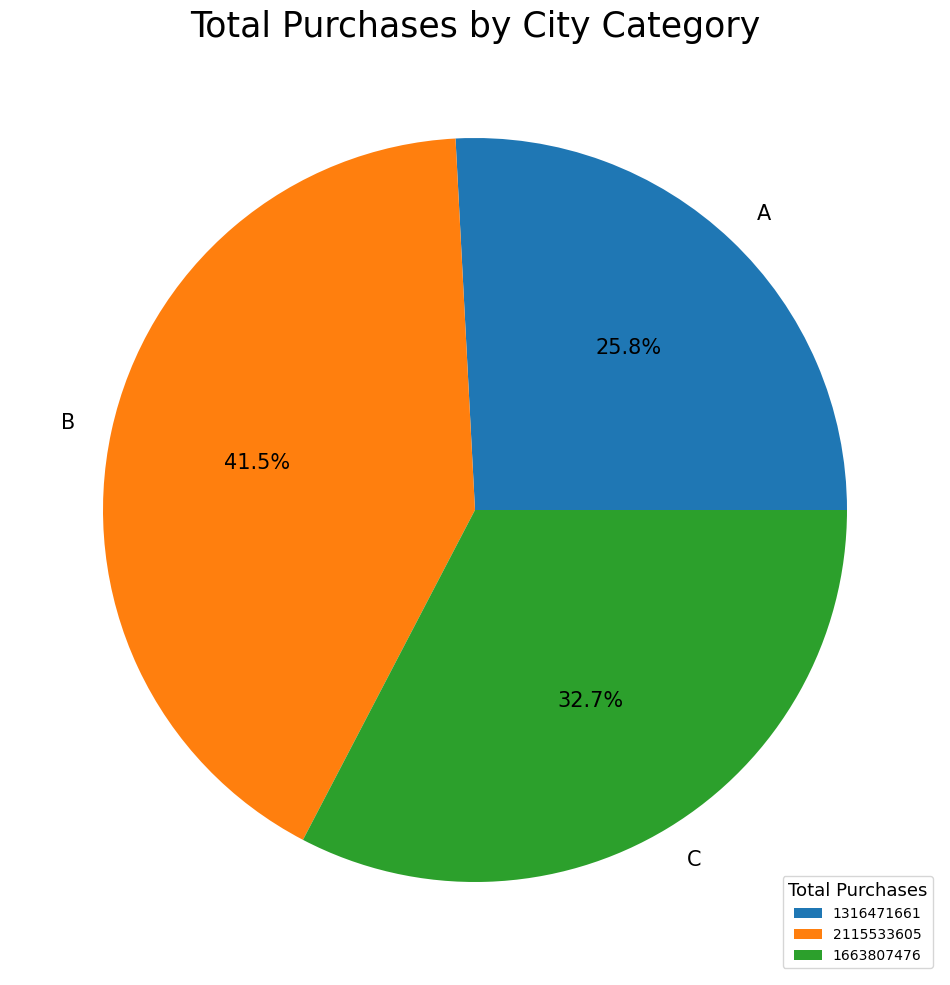

In [28]:
labels = City_df["Purchase"].keys()
sizes = City_df["Purchase"]
plt.figure(figsize = (12,20))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':15, 'color':"black"})
plt.title('Total Purchases by City Category',color = 'Black',fontsize = 25)
plt.legend(City_df["Purchase"], loc = 'lower right', title = 'Total Purchases', 
           title_fontsize = "13", fontsize = "10")
plt.show()

It is evident that the City Category "B" has the highest percentage of purchases (42%), but the margin isn't very high because "C" follows in second with almost 33% of the total.

In [29]:
# Checking the martial status on the purchases
df["Marital_Status"] = df["Marital_Status"].replace(0, "Single")
df["Marital_Status"] = df["Marital_Status"].replace(1, "Married")
df_married = df.groupby('Marital_Status')["Purchase"].sum()
df_married = pd.DataFrame(df_married)
df_married.head()

,Purchase
Marital_Status,
Married,2086885295
Single,3008927447


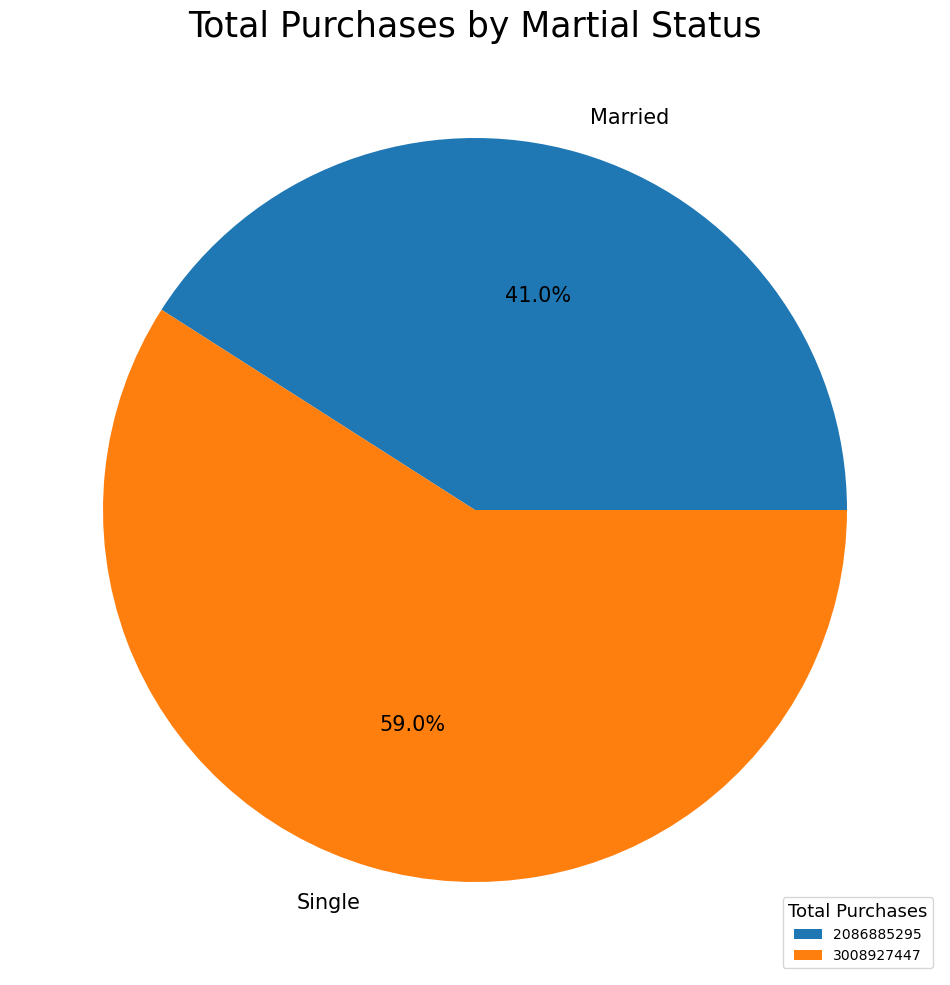

In [30]:
labels = df_married["Purchase"].keys()
sizes = df_married["Purchase"]
plt.figure(figsize = (12,20))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':15, 'color':"black"})
plt.title('Total Purchases by Martial Status',color = 'Black',fontsize = 25)
plt.legend(df_married["Purchase"], loc = 'lower right', title = 'Total Purchases', 
           title_fontsize = "13", fontsize = "10")
plt.show()

It was observed that the purchasing rate of singles is around 60% higher than that of married individuals.

In [31]:
# checking the categories the buyers have purchased
pc1_df = df.groupby('Product_Category_1')["Purchase"].sum()
pc1_df = pd.DataFrame(pc1_df)
pc1_df.reset_index(inplace = True)
#pc1_df

In [32]:
pc1_df_sort = pc1_df.sort_values("Purchase",  ascending = False)
pc1_df_sort.head(3)

,Product_Category_1,Purchase
0,1,1910013754
4,5,941835229
7,8,854318799


In [33]:
pc1_df_sort["Product_Category_1"] = pc1_df_sort["Product_Category_1"].astype(str)
pc1_df_sort.reset_index(inplace = True)
#pc1_p_sort

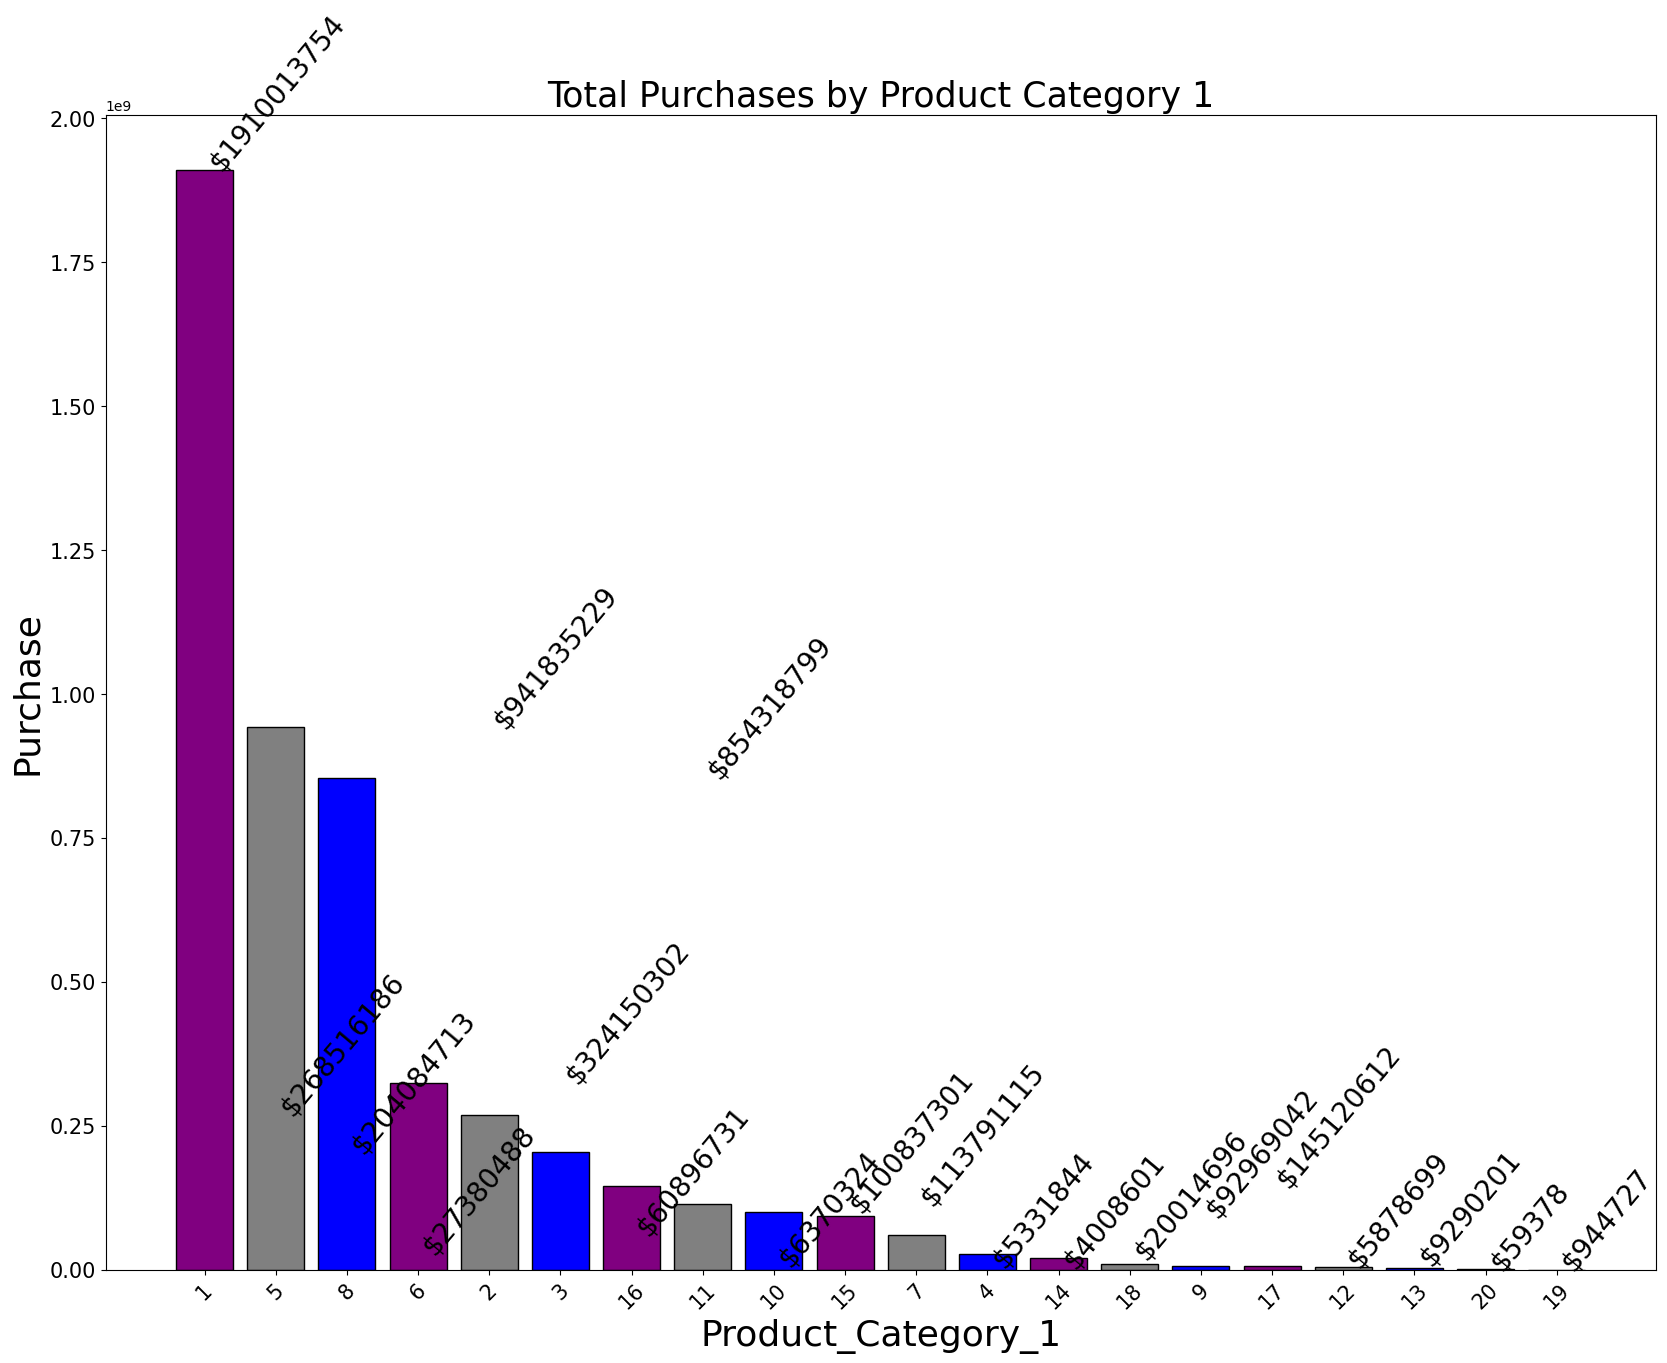

In [34]:
plt.figure(figsize = (20,15)) 
plt.bar(pc1_df_sort["Product_Category_1"], pc1_df_sort["Purchase"],
        color= ('purple', "grey", 'blue'),edgecolor='black', linewidth = 1)
plt.xticks(fontsize=15, rotation=45) 
plt.yticks(fontsize=15) 
plt.xlabel("Product_Category_1",fontsize=26) 
plt.ylabel("Purchase",fontsize=26) 
plt.title('Total Purchases by Product Category 1',color = 'Black',fontsize = 25)
for k,v in pc1_df["Purchase"].items(): 
    plt.text(k,v,'$'+ str(v), fontsize=20, rotation=50, color='k')

We saw that, in terms of our main product category list, Product Category "1" leads by a significant margin, followed by Product Categories "5" and "8" with similar numbers.

In [35]:
# Checking top products
product_df = df.groupby('Product_ID')["Purchase"].sum()
product_df = pd.DataFrame(product_df)
product_df.reset_index(inplace = True)
product_top = product_df.sort_values("Purchase",  ascending = False)
product_top["Product_ID"] = product_top["Product_ID"].astype(str)
product_df.head(3)

,Product_ID,Purchase
0,P00000142,12837476
1,P00000242,3967496
2,P00000342,1296475


In [36]:
product_top.reset_index(inplace = True)

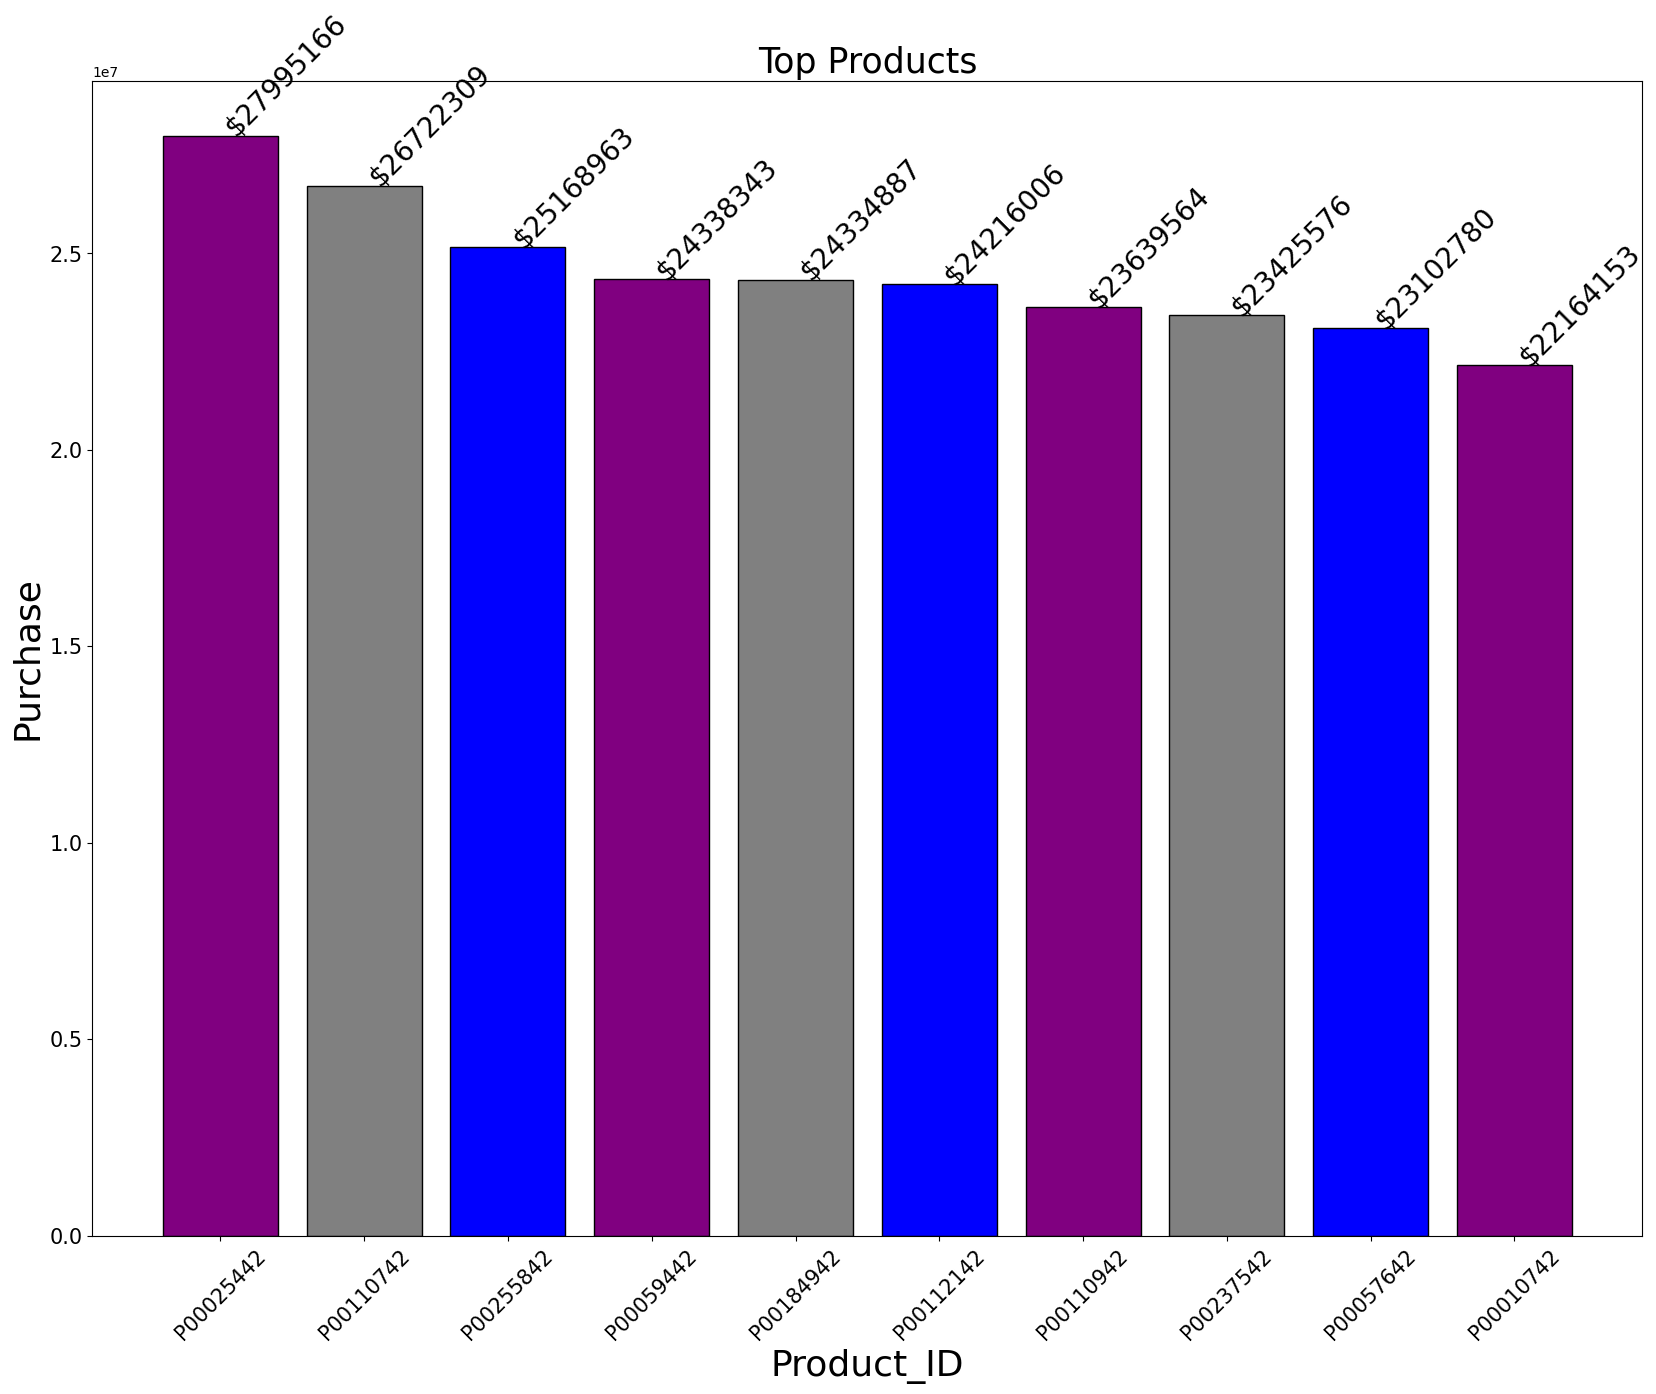

In [37]:
plt.figure(figsize = (20,15)) 
plt.bar(product_top["Product_ID"].head(10), product_top["Purchase"].head(10),
        color= ('purple', "grey", 'blue'),edgecolor='black', linewidth = 1)
plt.xticks(fontsize=15, rotation=45) 
plt.yticks(fontsize=15) 
plt.xlabel("Product_ID",fontsize=26) 
plt.ylabel("Purchase",fontsize=26) 
plt.title('Top Products',color = 'Black',fontsize = 25)
for k,v in product_top["Purchase"].head(10).items(): 
    plt.text(k,v,'$'+ str(v), fontsize=20, rotation=45, color='k')

The top ten products are displayed above.

In [38]:
# checking the top customers
Cust_df = df.groupby('User_ID')["Purchase"].sum()
Cust_df = pd.DataFrame(Cust_df)
Cust_df.reset_index(inplace = True)
cust_top = Cust_df.sort_values("Purchase",  ascending = False)
cust_top["User_ID"] = cust_top["User_ID"].astype(str)
cust_top.reset_index(inplace = True)

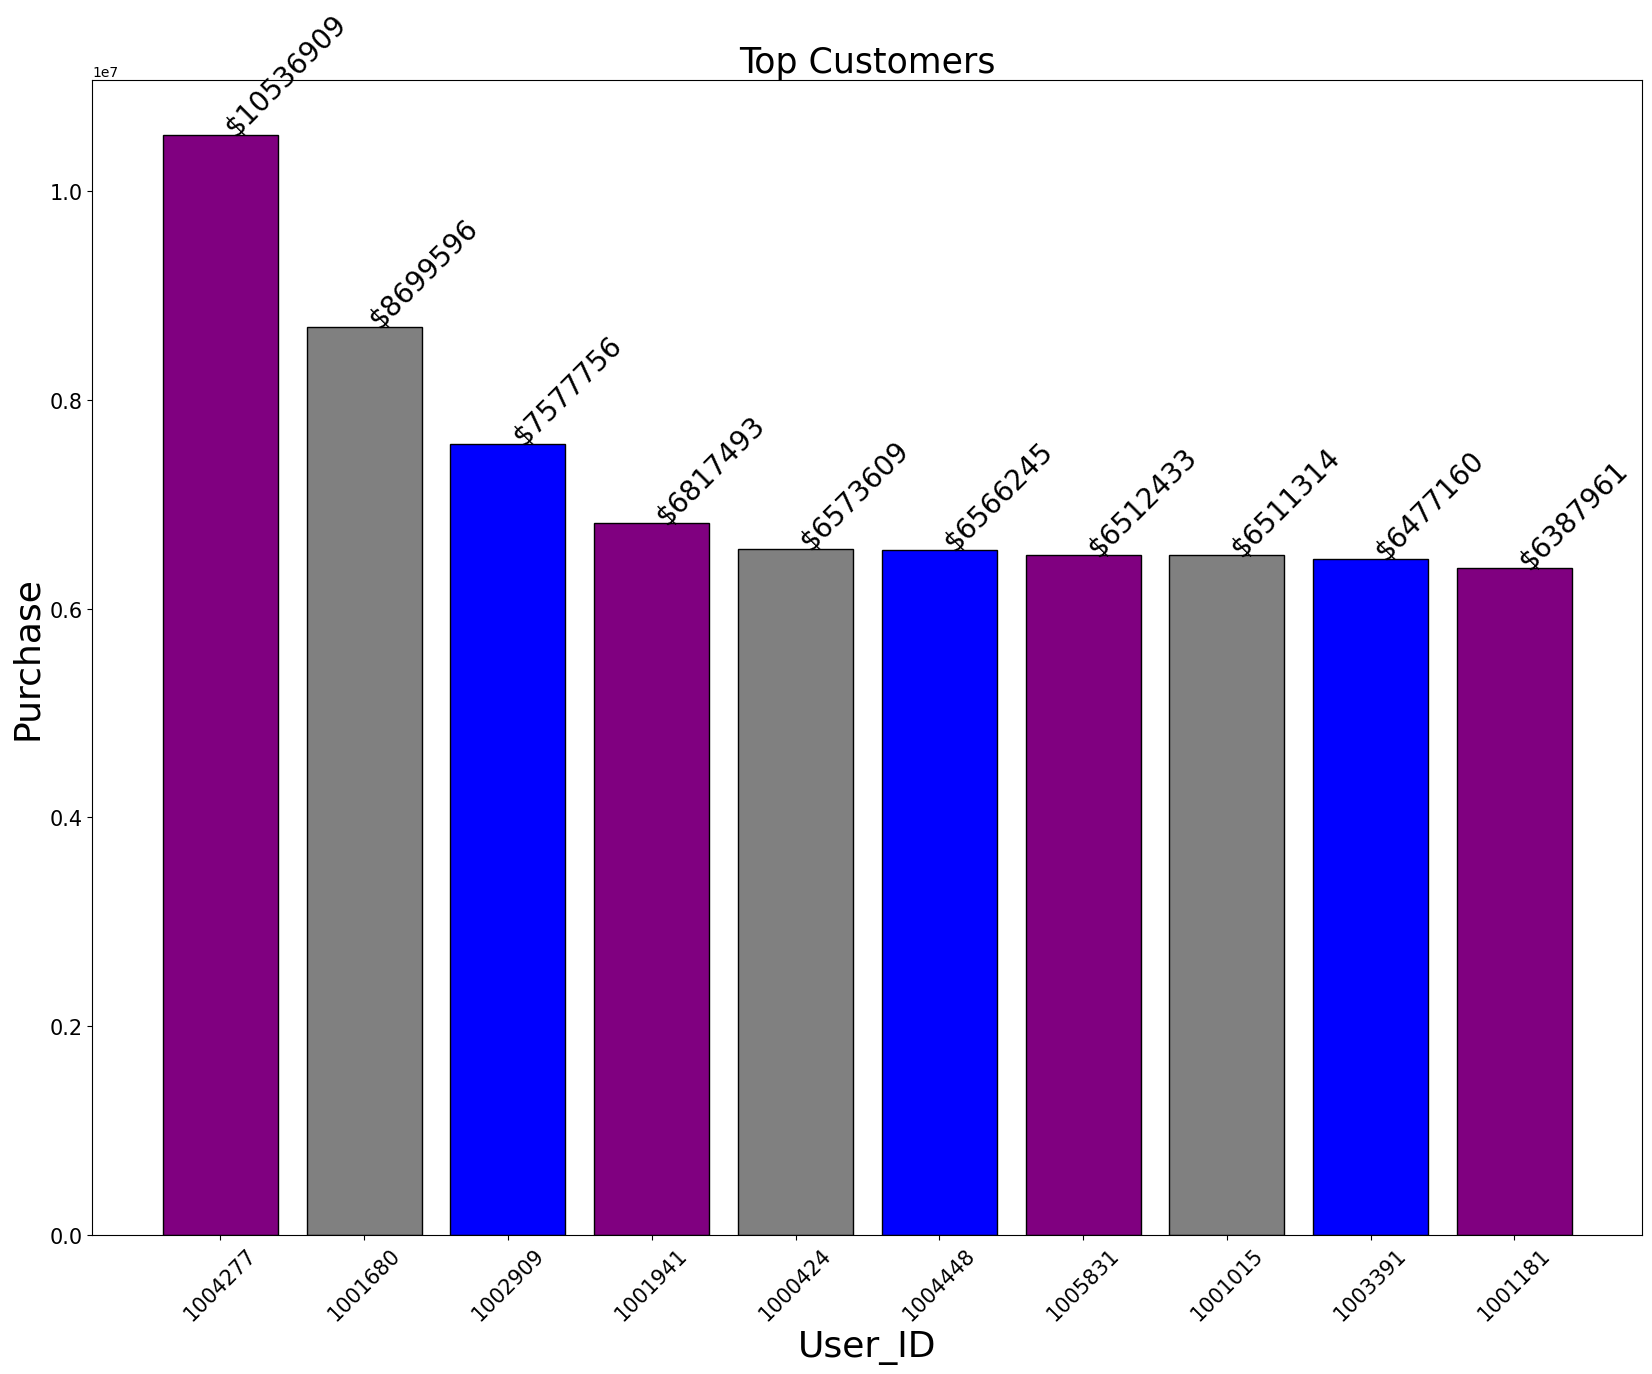

In [39]:
plt.figure(figsize = (20,15)) 
plt.bar(cust_top["User_ID"].head(10), cust_top["Purchase"].head(10),
        color= ('purple', "grey", 'blue'),edgecolor='black', linewidth = 1)
plt.xticks(fontsize=15, rotation=45) 
plt.yticks(fontsize=15) 
plt.xlabel("User_ID",fontsize=26) 
plt.ylabel("Purchase",fontsize=26) 
plt.title('Top Customers',color = 'Black',fontsize = 25)
for k,v in cust_top["Purchase"].head(10).items(): 
    plt.text(k,v,'$'+ str(v), fontsize=20, rotation=45, color='k')

The top ten products are customers above.

In [40]:
display(df[df["User_ID"] == 1004277].head(1))
display(df[df["User_ID"] == 1001680].head(1))
display(df[df["User_ID"] == 1002909].head(1))

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
27930,1004277,P00034742,M,36-45,16,A,0,Single,5,8763


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
11055,1001680,P00036742,M,26-35,20,A,3,Married,1,15670


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
18468,1002909,P00297742,M,26-35,7,A,1,Single,8,8112


As we might obtain the subsequent:

All of them are men.

Two belong to the young adults (ages 26 to 35) category, while the third one is elderly adults.

All of them are from city category A.

Of them, two are unmarried.

Two of them left the current city after less than a year.


### Conclusion

Several important conclusions were drawn from the Black Friday dataset study. First, it was noted that the dataset contains roughly 3631 distinct goods. Subsequent investigation revealed that male consumers made the majority of the purchases, pointing to a possible bias for one gender over another in consumer behavior. Furthermore, it was shown that young individuals between the ages of 26 and 35 accounted for the greatest percentage of purchases, suggesting that this age group had greater purchasing power.

In addition, some professions showed larger purchase volumes, suggesting that various professions have varied purchasing patterns. It's interesting to note that the data showed that single consumers tended to buy more than married customers, suggesting a possible relationship between marital status and purchasing behavior.

Further evidence of consumer preferences for particular product types came from the emergence of particular product categories as important drivers of purchasing. Notable patterns were also found when the top three clients were examined in more detail. The three clients were all men, two of whom were in the 26–35 age range and one of whom was in the older people category. Moreover, all three clients were from city category A, indicating possible regional effects on consumer behavior. Further information about the characteristics and habits of high-value clients may be gained from the fact that two of the top customers were single and that two of them had only been in the present city for a short time.

Overall, the analysis demonstrated how crucial product categories are in shaping consumer choices and offered insightful information about the characteristics, behaviors, and preferences of consumers that can be used to develop more focused marketing campaigns and product offerings.

